In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Load data and store in dataframe df

In [35]:
# path of data 
import boto3
from aws_s3_credentials import access_key_id, secret_access_key
s3 = boto3.resource(
    service_name = 's3',
    region_name = 'eu-central-1',
    aws_access_key_id = 'access_key_id',
    aws_secret_access_key = 'secret_access_key'
    )
file = s3.Bucket ('filesdir').download_file (Key='csv/automobileEDA.csv', Filename='automobileEDA.csv')
df = pd.read_csv ('automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


#### 1. Linear Regression and Multiple Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression()
lm

LinearRegression()

**Highway-mpg as car price predictor**

In [38]:
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)

#Prediction
Yhat=lm.predict(X)
Yhat[0:5]   

#Intercept
lm.intercept_

#Slope
lm.coef_

array([-821.73337832])

**Engine size as car price predictor**

In [39]:
lm1 = LinearRegression()
lm1.fit(df[["engine-size"]], df[["price"]])
lm1

#Slope
print(lm1.coef_)

#Intercept
print(lm1.intercept_)

[[166.86001569]]
[-7963.33890628]


**Checking the list of variables as price predictors**

In [40]:
lm2 = LinearRegression()
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm2.fit(Z, df['price'])

#Slope
print(lm2.coef_)

#Intercept
print(lm2.intercept_)

[53.49574423  4.70770099 81.53026382 36.05748882]
-15806.624626329198


In [41]:
#MLR "lm3" with price as a response variable, and 'normalized-losses' and 'highway-mpg' as the predictor variable
lm3 = LinearRegression()
lm3.fit(df[['normalized-losses', 'highway-mpg']], df['price'])

#Slope
print(lm3.coef_)

#Intercept
print(lm3.intercept_)

[   1.49789586 -820.45434016]
38201.31327245728


#### 2. Model Evaluation using Visualization

In [42]:
import seaborn as sns
%matplotlib inline 

**Regression Plot**

(0.0, 48164.33245506662)

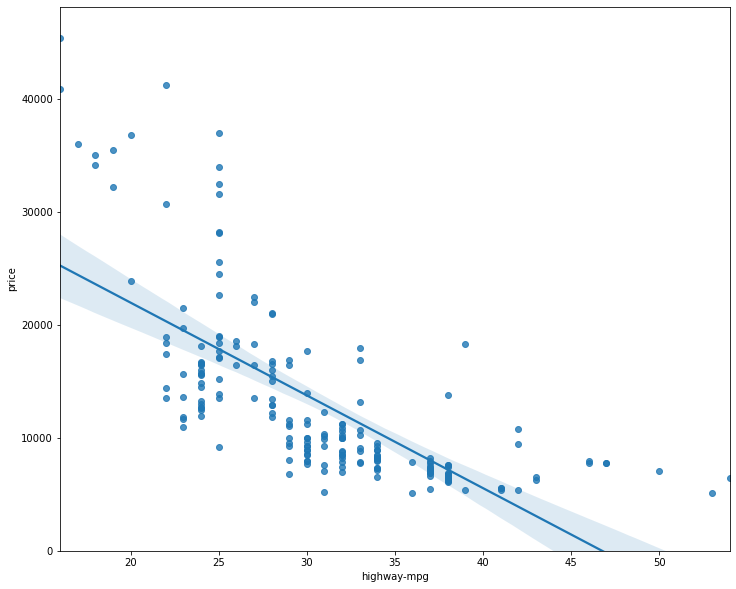

In [43]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

In [78]:
# Plot shows that price is negatively correlated to highway-mpg, since the regression slope is negative. 
# Since the data is far off from the line, this linear model might not be the best model for this data

(0.0, 47414.1)

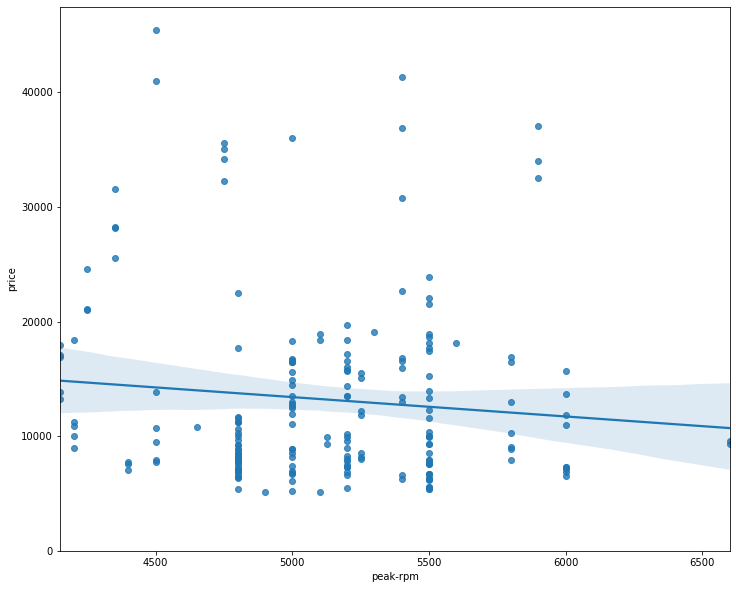

In [44]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [45]:
# Verifying stronger predictor
df[["peak-rpm", "highway-mpg", "price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


**Residual Plot**

C:\Users\potapenk\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


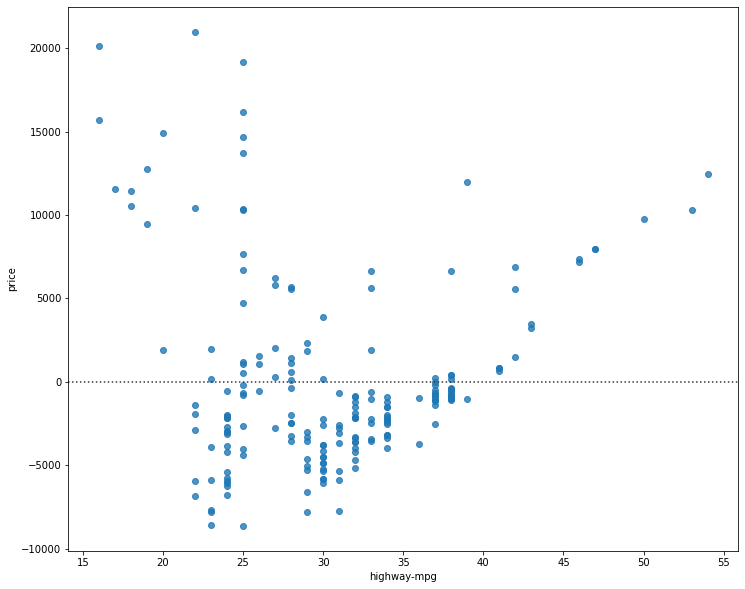

In [46]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

In [ ]:
# Randomly spread out residuals means that the variance is constant, 
# and thus the linear model is a good fit for this data

**Multiple Linear Regression**

C:\Users\potapenk\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\potapenk\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


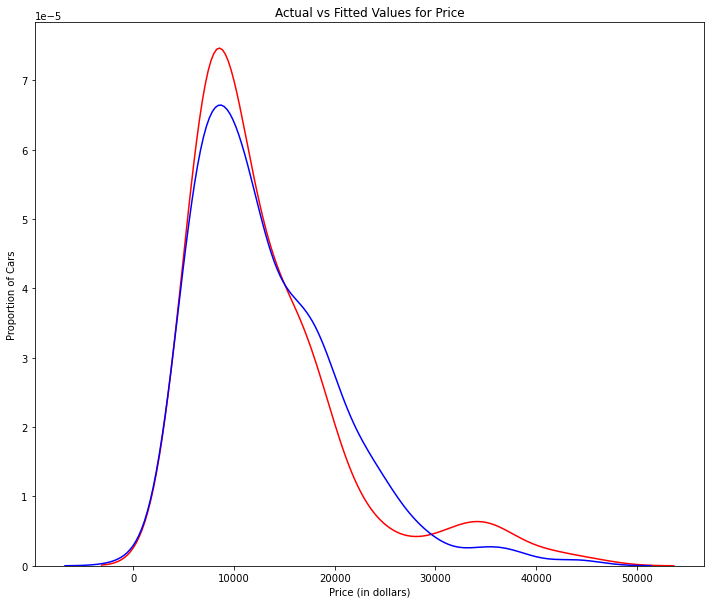

In [50]:
# Making prediction
Y_hat = lm2.predict(Z)

plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

#### 3. Polynomial Regression and Pipelines

In [51]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [52]:
# Get variables
x = df['highway-mpg']
y = df['price']

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


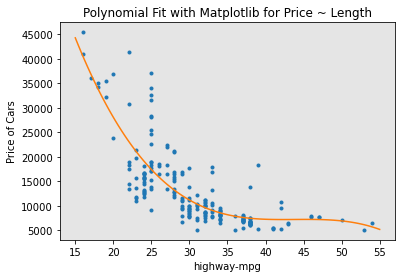

In [53]:
# Fitting polynomial of 3rd order
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

PlotPolly(p, x, y, 'highway-mpg')

In [54]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

**Creating 10 order polynomial model**

            10             9            8          7         6
-1.571e-08 x  + 6.724e-06 x - 0.001243 x + 0.1315 x - 8.837 x
          5             4             3             2
 + 395.1 x - 1.191e+04 x + 2.393e+05 x - 3.065e+06 x + 2.259e+07 x - 7.267e+07


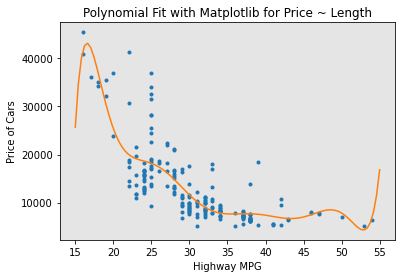

In [55]:
f1 = np.polyfit(x, y, 10)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1, x, y, 'Highway MPG')

**Performing a polynomial transform on multiple features**

In [56]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
# Creating a PolynomialFeatures object of degree 2
pr=PolynomialFeatures(degree=2)
pr

# Shape before transformation
Z_pr=pr.fit_transform(Z)
Z.shape

# Shape after transforamtion
Z_pr.shape

(201, 15)

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

**Creating a pipeline**

In [59]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [60]:
# Normalizing the data, performing a transform and fitting the model
pipe.fit(Z,y)
ypipe=pipe.predict(Z)
ypipe[0:10]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164, 13880.09787302, 15041.58694037, 15457.93465485,
       17974.49032347, 10510.56542385])

#### 4. Measures for In-Sample Evaluation

**Model 1: Simple Linear Regression**

In [61]:
# R^2
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


In [79]:
#We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "highway_mpg_fit"

In [62]:
# Mean Squared Error
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [63]:
from sklearn.metrics import mean_squared_error

In [64]:
# Compare the predicted results with the actual results
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


**Model 2: Multiple Linear Regression**

In [65]:
# R^2
#Z-list of variables_fit 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [ ]:
#~ 80.9 % of the variation of price is explained by this multiple linear regression

In [66]:
Y_predict_multifit = lm.predict(Z)
#compare the predicted results with the actual results
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


**Model 3: Polynomial Fit**

In [67]:
# R^2
from sklearn.metrics import r2_score

r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [80]:
#~ 67.4 % of the variation of price is explained by this polynomial fit

In [81]:
# Mean Squared Error
mean_squared_error(df['price'], p(x))

20474146.426361218

#### 5. Prediction and Decision Making

In [69]:
import matplotlib.pyplot as plt
import numpy as np

new_input=np.arange(1, 100, 1).reshape(-1, 1)
lm.fit(X, Y)
lm

LinearRegression()

In [70]:
# Prediction
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

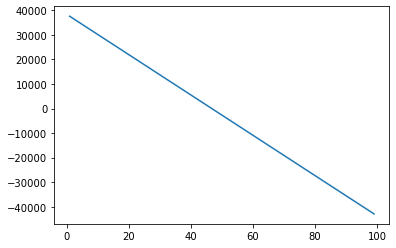

In [71]:
# Plot the data
plt.plot(new_input, yhat)
plt.show()

#### Conclusions

In [83]:
#Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
print('R-square: ', lm.score(X, Y))
print('MSE: ', mse)

#Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
print('R-square: ', lm2.score(Z, df['price']))
print('MSE: ', mean_squared_error(df['price'], Y_predict_multifit))

#Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
print('R-square: ', r_squared)
print('MSE: ', mean_squared_error(df['price'], p(x)))

R-square:  0.4965911884339175
MSE:  0x1.e2b662f1d3eb9p+24
R-square:  0.8093562806577457
MSE:  11980366.87072649
R-square:  0.674194666390652
MSE:  20474146.426361218


In [111]:
results = {'Model': ['SLR', 'MLR', 'Polynomial Fit'],
           'R-square': ['%.4f' % lm.score(X, Y), '%.4f' % lm2.score(Z, df['price']), '%.4f' % r_squared],
           'MSE': ['%.4f' % mse, '%.4f' % mean_squared_error(df['price'], Y_predict_multifit), '%.4f' % mean_squared_error(df['price'], p(x))]
          }

results = pd.DataFrame(results).sort_values(by=['R-square', 'MSE'], ascending=False)
pd.DataFrame(results).style.hide_index()

Model,R-square,MSE
MLR,0.8094,11980366.8707
Polynomial Fit,0.6742,20474146.4264
SLR,0.4966,31635042.9446


Multiple Linear Regression (MLR) vs Polynomial Fit and Simple Linear Regression
MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit and SLR.
R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit and SLR.

We may conclude that comparing these three models, the MLR model is the best model to be able to predict price from our dataset. Which makes sense, as we have 27 variables and and we know that potentially more than one of those variables can be predictors of the final car price.